## Implementando Reconhecimento Facial com OpenCV e LBPH
Diego Hartwig - 2024

In [13]:
# Importação das bibliotecas
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
import zipfile
import os

In [4]:
# Montando o drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#!rm -rf 'yalefaces'

In [11]:
path = '/content/drive/MyDrive/Projetos_IA/Reconhecimento_Facial_OpenCV/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

# Pré-processamento das imagens

In [14]:
print(os.listdir('/content/yalefaces/train'))

['subject09.centerlight.gif', 'subject08.sad.gif', 'subject12.centerlight.gif', 'subject15.happy.gif', 'subject09.wink.gif', 'subject09.leftlight.gif', 'subject01.sad.gif', 'subject05.glasses.gif', 'subject11.glasses.gif', 'subject05.centerlight.gif', 'subject14.centerlight.gif', 'subject05.wink.gif', 'subject04.rightlight.gif', 'subject05.leftlight.gif', 'subject07.normal.gif', 'subject12.happy.gif', 'subject01.glasses.gif', 'subject08.surprised.gif', 'subject11.sleepy.gif', 'subject09.happy.gif', 'subject11.wink.gif', 'subject05.happy.gif', 'subject03.surprised.gif', 'subject04.noglasses.gif', 'subject03.noglasses.gif', 'subject14.leftlight.gif', 'subject04.sad.gif', 'subject10.surprised.gif', 'subject14.surprised.gif', 'subject14.normal.gif', 'subject02.wink.gif', 'subject11.centerlight.gif', 'subject07.glasses.gif', 'subject09.noglasses.gif', 'subject10.happy.gif', 'subject09.sleepy.gif', 'subject14.sad.gif', 'subject12.sad.gif', 'subject13.leftlight.gif', 'subject02.rightlight.gif

In [29]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  print(paths)
  faces = []
  ids = []

  for path in paths:
    imagem = Image.open(path).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces


In [31]:
ids, faces = get_image_data()

['/content/yalefaces/train/subject09.centerlight.gif', '/content/yalefaces/train/subject08.sad.gif', '/content/yalefaces/train/subject12.centerlight.gif', '/content/yalefaces/train/subject15.happy.gif', '/content/yalefaces/train/subject09.wink.gif', '/content/yalefaces/train/subject09.leftlight.gif', '/content/yalefaces/train/subject01.sad.gif', '/content/yalefaces/train/subject05.glasses.gif', '/content/yalefaces/train/subject11.glasses.gif', '/content/yalefaces/train/subject05.centerlight.gif', '/content/yalefaces/train/subject14.centerlight.gif', '/content/yalefaces/train/subject05.wink.gif', '/content/yalefaces/train/subject04.rightlight.gif', '/content/yalefaces/train/subject05.leftlight.gif', '/content/yalefaces/train/subject07.normal.gif', '/content/yalefaces/train/subject12.happy.gif', '/content/yalefaces/train/subject01.glasses.gif', '/content/yalefaces/train/subject08.surprised.gif', '/content/yalefaces/train/subject11.sleepy.gif', '/content/yalefaces/train/subject09.happy.gi

# Treinamento do classificador LBPH

In [84]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14, grid_x=9, grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('classificadorLBPH.yml')

# Reconhecimento de faces

In [85]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('classificadorLBPH.yml')

In [86]:
imagem_teste = '/content/yalefaces/test/subject07.happy.gif'

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
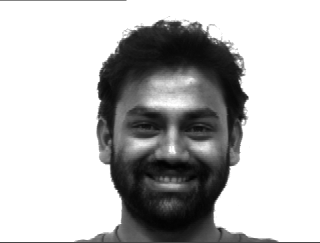

In [87]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

In [88]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(7, 53.03735016959249)

In [89]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada


7

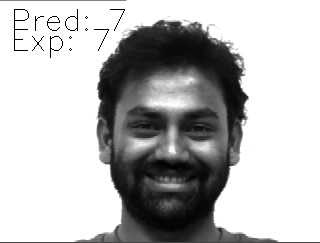

In [90]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0))
cv2_imshow(imagem_np)

# Avaliação do classificador

In [91]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []

for path in paths:
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)


In [92]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [93]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [94]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [95]:
previsoes

array([ 3,  4,  9,  5,  4,  4,  1,  3,  5,  1,  4, 12,  6, 14,  7,  8])

In [96]:
saidas_esperadas

array([3, 2, 7, 5, 4, 4, 1, 3, 5, 1, 8, 2, 6, 6, 7, 8])

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score (saidas_esperadas, previsoes)

0.6875

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

<Axes: >

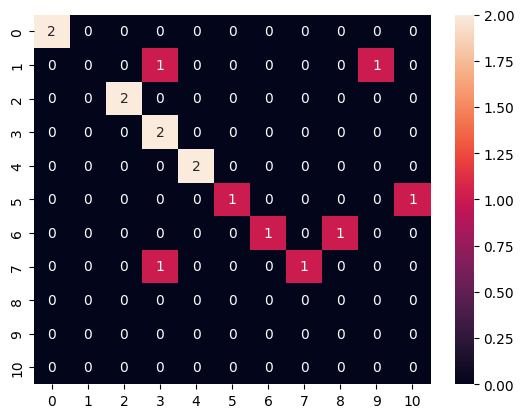

In [103]:
import seaborn
seaborn.heatmap(cm, annot=True)